In [1]:
from astropy.table import Table
import numpy as np
from matplotlib import pyplot as plt
from astropy import stats
%matplotlib inline

In [2]:
cat = Table.read("apogeedata_bulge.fits.gz", 1)

# Remove trailing spaces
for i in range(len(cat)):
    cat['FIELD'][i] = cat['FIELD'][i].strip()
uniqueFields = np.unique(cat["FIELD"])
uniqueFields = uniqueFields[:182]

posFieldsMatch = []
negFieldsMatch = []
posFieldsMatchFast = []
negFieldsMatchFast = []
matchingFields = []
for field in uniqueFields:
    if 180 > (int(field[0])+int(field[1])+int(field[2])) > 0:
        ind, = np.where(cat["FIELD"] == field)
        data = cat[ind]
        oInd, = np.where(cat["FIELD"] == (str(360-int(field[:3]))+field[3:]))
        dataO = cat[oInd]
        if len(dataO["FIELD"]) == 0:
            pass
        else:
            posFieldsMatch.append(data["FIELD"][0])
            negFieldsMatch.append(dataO["FIELD"][0])
            
negFieldsMatch.reverse()
matchingFields = posFieldsMatch + negFieldsMatch

#postive longitude is left side of buldge
#field format is longitude+latitude
#use help(INSERT COMMAND HERE) to get help on things

C:\Users\jakeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


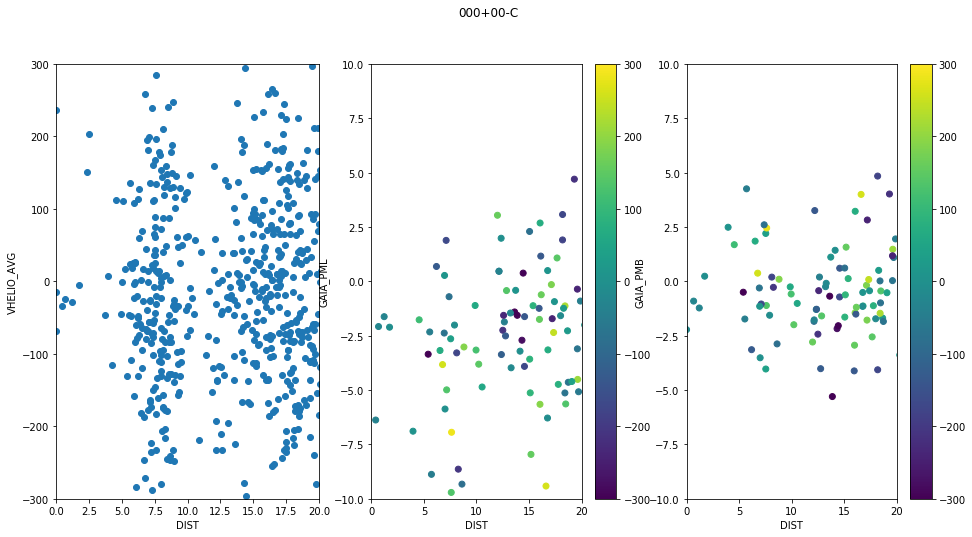

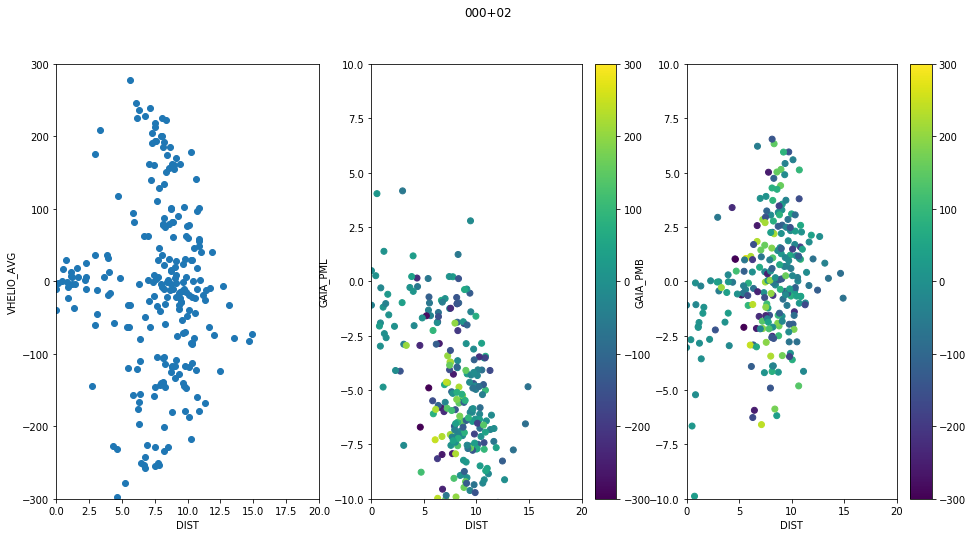

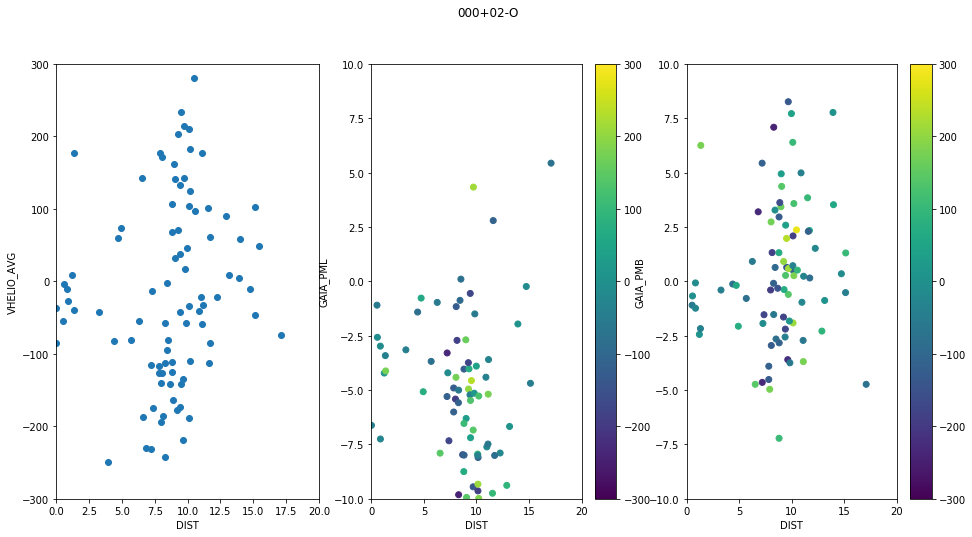

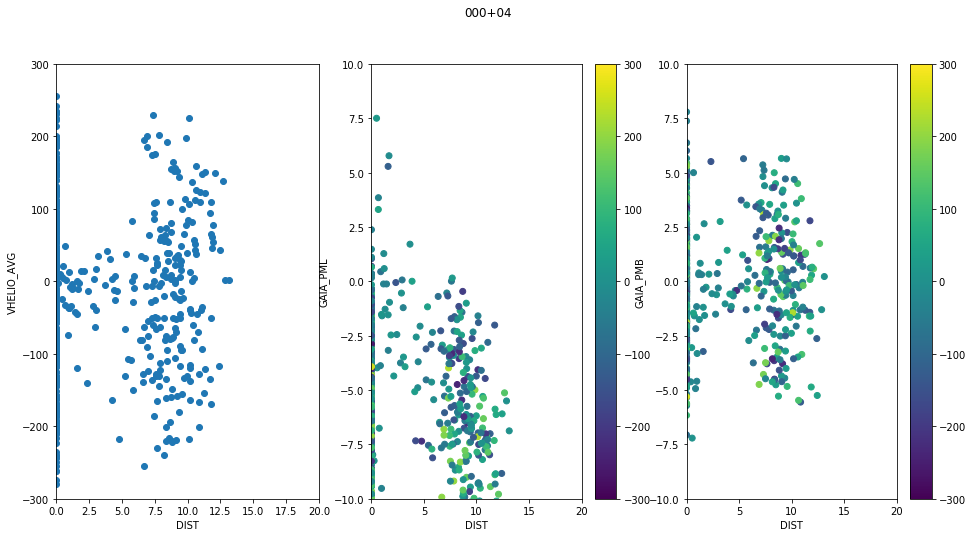

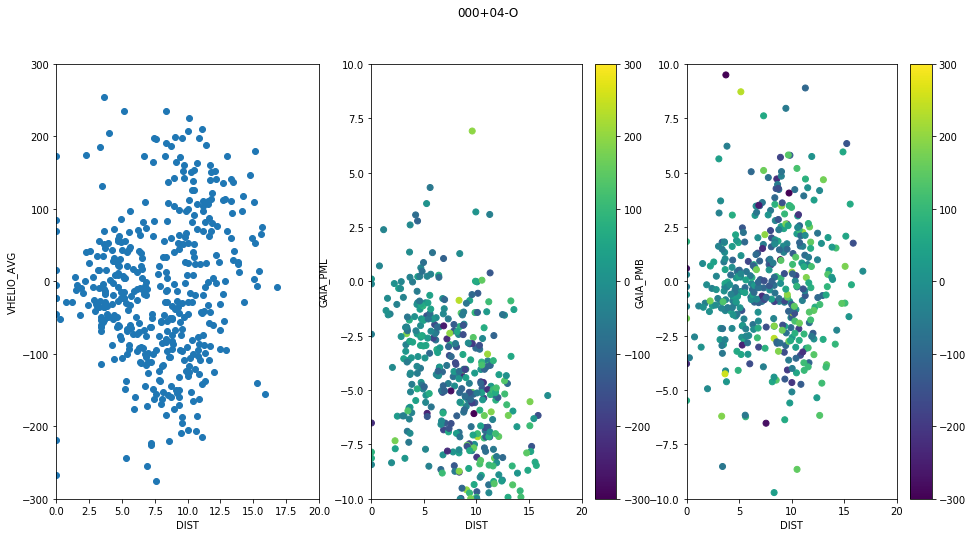

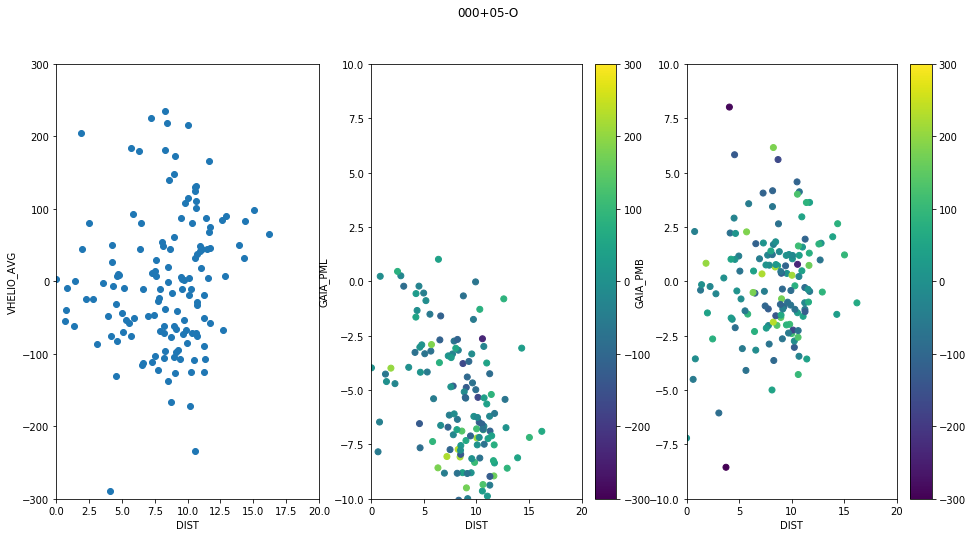

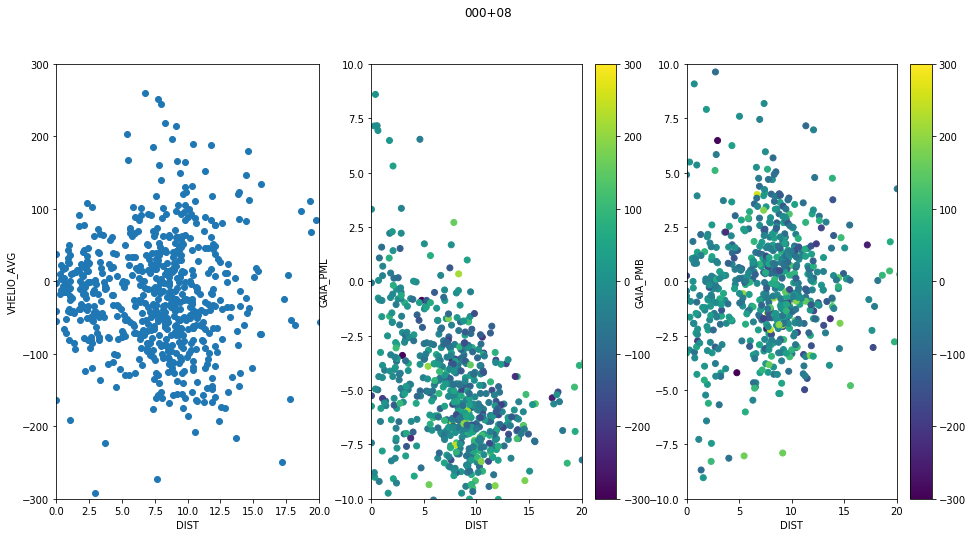

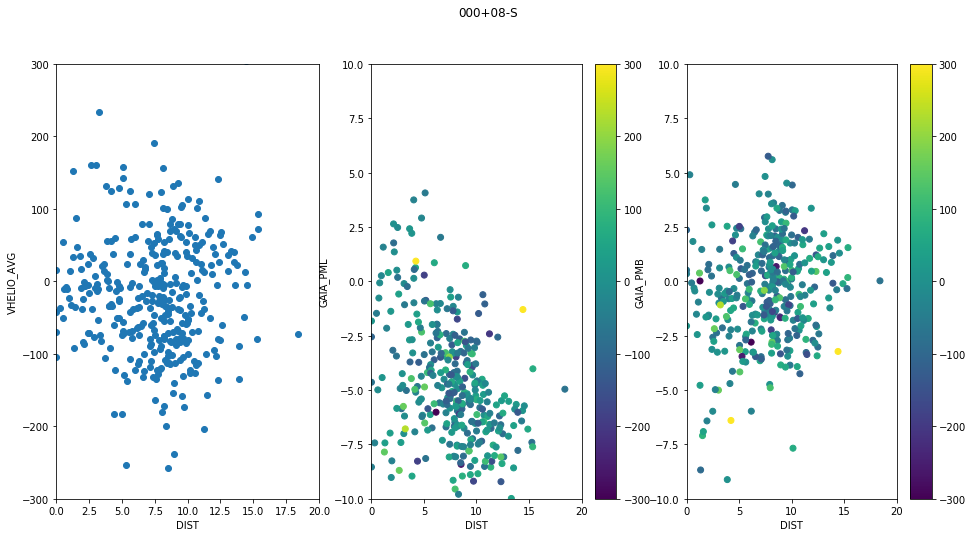

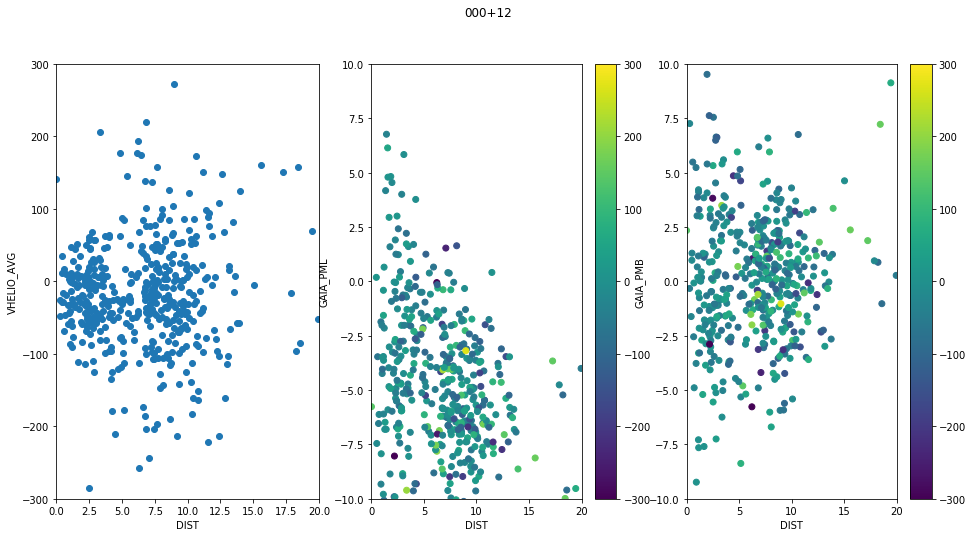

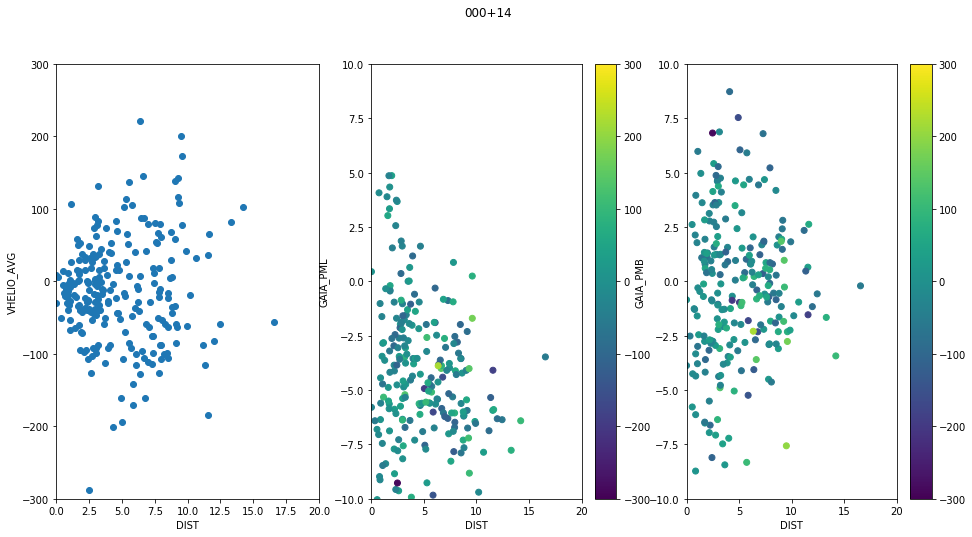

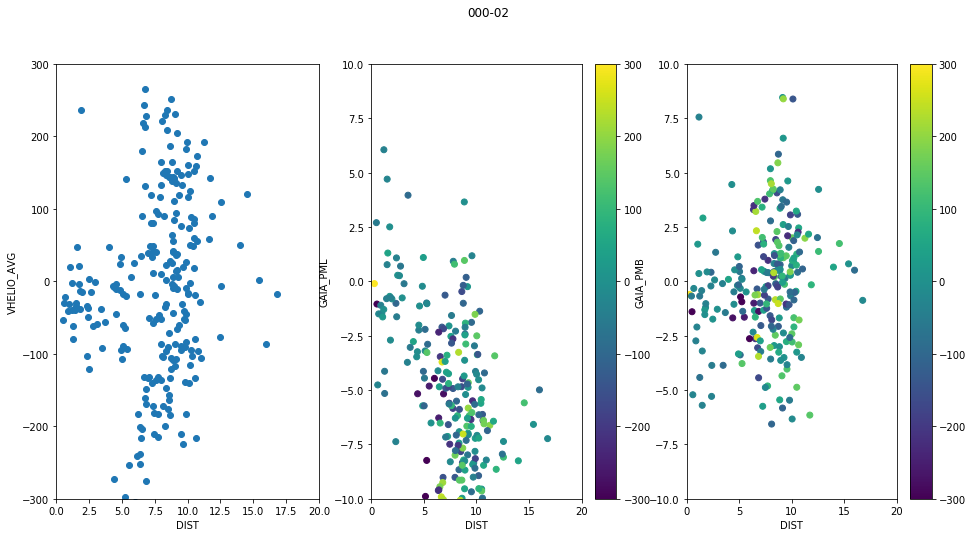

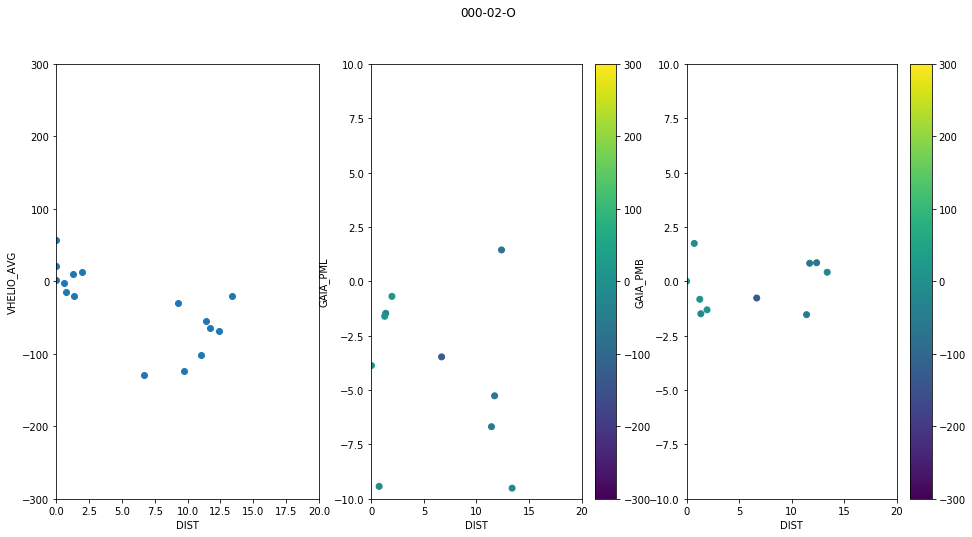

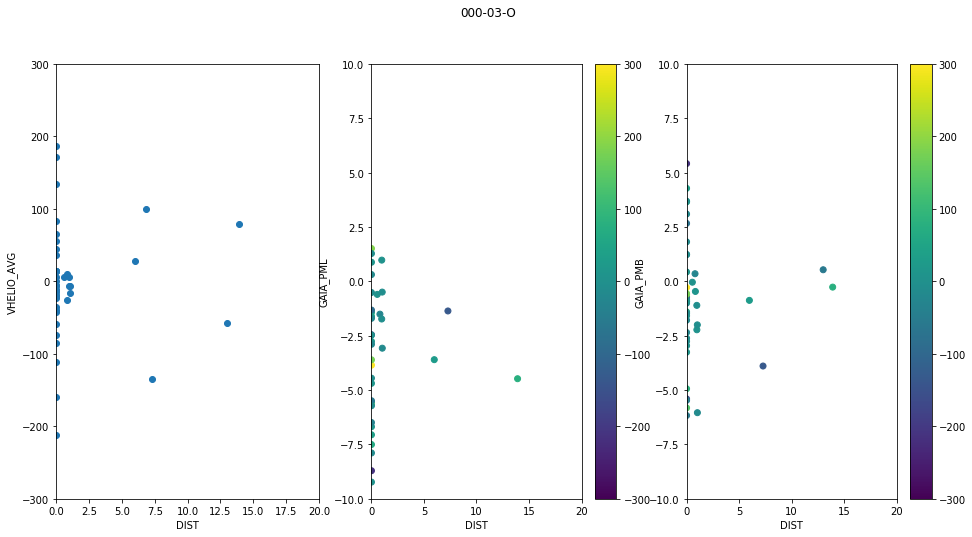

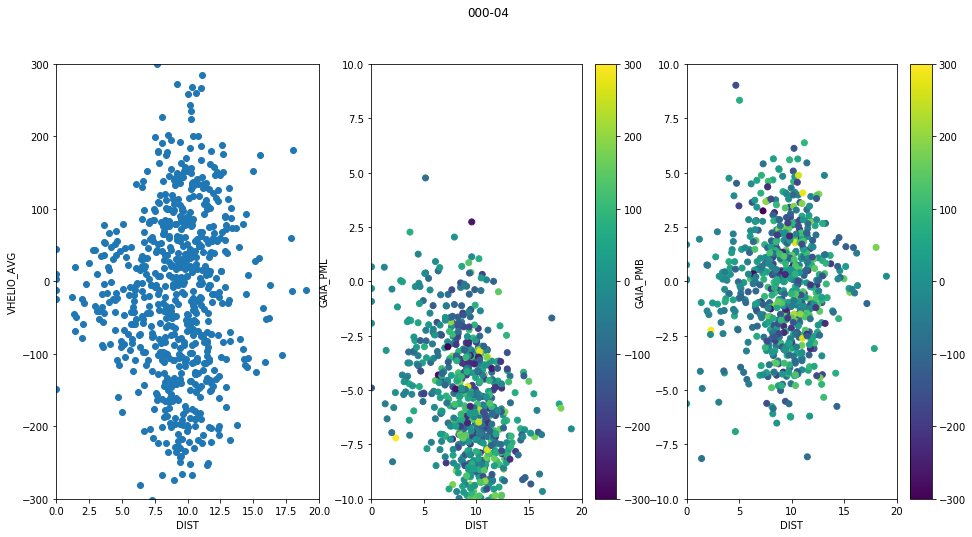

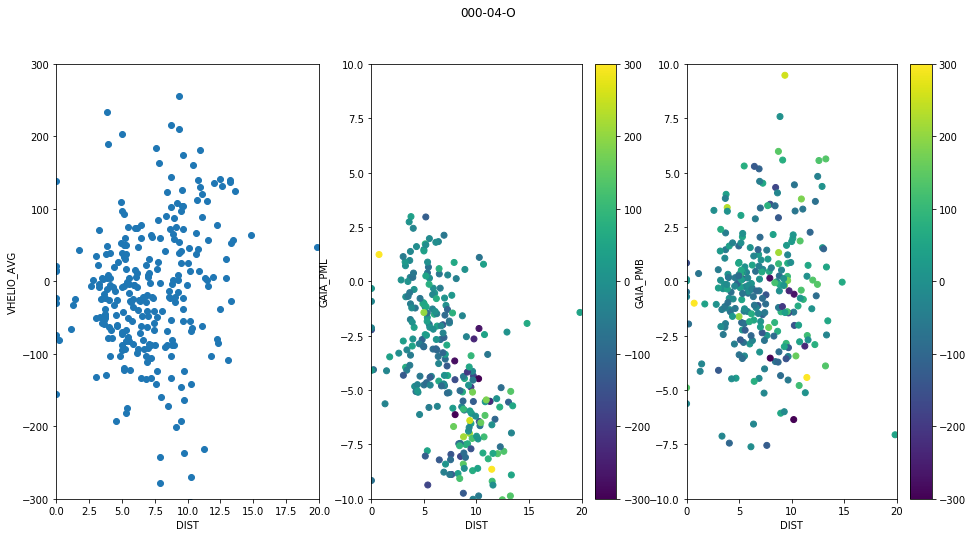

In [ ]:
y_axis = ["VHELIO_AVG", "GAIA_PML", "GAIA_PMB"]
for i in uniqueFields:
    ind, = np.where((cat["FIELD"]==i) & (abs(cat['VHELIO_AVG'])<1000) & (cat['SNR']>20) & (cat['LOGG']<3.8))
    field = cat[ind]
    dist = field["DIST"]
    plt.figure(figsize = (16,8))
    for k,axis in enumerate(y_axis, start=1):
        y = field[axis]
        plt.subplot(1, 3, k)
        if axis != "VHELIO_AVG":
            color = field["VHELIO_AVG"]
            plt.scatter(dist, y, c = color, vmin = -300, vmax = 300)
            plt.ylim(-10,10)
            plt.xlim(0,20)
            plt.xlabel("DIST")
            plt.ylabel(axis)
            plt.colorbar()
        else:
            plt.scatter(dist, y)
            plt.ylim(-300,300)
            plt.xlim(0,20)
            plt.xlabel("DIST")
            plt.ylabel(axis)
        plt.suptitle(i)